# Código para geração de gráficos

O código abaixo cria os gráficos utilizados no trabalho com base nos arquivos de saída do algoritmo criado com Java.

## Importando dados

Antes de mais nada, precisamos importar os dados de duração do algoritmo de determinantes aplicando:

- Nenhuma otimização (baseline);

- Otimizações iniciais (versão 1);

- Otimizações extras (versão 2).

In [2]:
import pandas as pd

# Constantes que servem de rótulos dos dataframes seguintes
HEADER = ['tentativa_1', 'tentativa_2', 'tentativa_3']
INDEX = [3, 5, 7, 9, 11, 13]

# Bases de dados extraídas dos arquivos de saída de cada algoritmo
baseline_times = pd.read_csv('saida_baseline_ns.txt', sep=' ', lineterminator='\n', names=HEADER, index_col=False)
baseline_times.index = INDEX

v1_optimization_times = pd.read_csv('saida_otimizacao_v1_ns.txt', sep=' ', lineterminator='\n', names=HEADER, index_col=False)
v1_optimization_times.index = INDEX

v2_optimization_times = pd.read_csv('saida_otimizacao_v2_ns.txt', sep=' ', lineterminator='\n', names=HEADER, index_col=False)
v2_optimization_times.index = INDEX

## Visualizando os dados

Vamos mostrar o comportamento temporal dos algoritmos usando os dados importados. Antes disso, vamos visualizar as tabelas com os valores de tempo.

OBS: Os valores estão expressos em nanossegundos (para ordens < 9) e em milissegundos (para ordens >= 9).

Nas tabelas, as linhas representam a ordem matricial e as colunas representam as três tentativas utilizadas para fazer medições.

Primeiro, vamos adicionar aos dados as *médias* de cada algoritmo:

In [3]:
baseline_times['media'] = baseline_times.mean(axis=1)
v1_optimization_times['media'] = v1_optimization_times.mean(axis=1)
v2_optimization_times['media'] = v2_optimization_times.mean(axis=1)

Vamos adicionar aos dados o *desvio padrão* de cada algoritmo:

In [4]:
baseline_times['desvio'] = baseline_times.std(axis=1)
v1_optimization_times['desvio'] = v1_optimization_times.std(axis=1)
v2_optimization_times['desvio'] = v2_optimization_times.std(axis=1)

Agora, podemos visualizar os dados em formato de tabela.

Primeiro, o resultado da execução do algoritmo sem otimizações (baseline).

In [5]:
baseline_times

,tentativa_1,tentativa_2,tentativa_3,media,desvio
3,0,0,0,0.000000e+00,0.000000
5,0,1,0,3.333333e-01,0.471405
7,7,10,17,1.133333e+01,4.189935
9,229,82,117,1.426667e+02,62.696801
11,10297,7337,7206,8.280000e+03,1427.236724
13,1104894,1102738,1101266,1.102966e+06,1489.873373


Os resultados do algoritmo com otimizações iniciais (versão 1):

In [6]:
v1_optimization_times

,tentativa_1,tentativa_2,tentativa_3,media,desvio
3,0,7,0,2.333333,3.299832
5,5,1,0,2.000000,2.160247
7,5,1,1,2.333333,1.885618
9,57,43,35,45.000000,9.092121
11,4827,4280,3974,4360.333333,352.838333
13,531570,411491,341476,428179.000000,78497.555023


Os resultados do algoritmo com otimizações extras (versão 2):

In [7]:
v2_optimization_times

,tentativa_1,tentativa_2,tentativa_3,media,desvio
3,0,1,0,0.333333,0.471405
5,0,0,0,0.000000,0.000000
7,7,2,20,9.666667,7.586538
9,41,51,29,40.333333,8.993825
11,4962,4338,3978,4426.000000,406.507073
13,533707,410240,342476,428807.666667,79166.038696


In [8]:
import matplotlib.pyplot as plt

In [12]:
def showResults(datasets, labels, log=True, show_std=True, show_in_ms=False):
    plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário

    for i, data in enumerate(datasets):
        index = data.index
        mean = data['media']
        std = data['desvio']

        if show_in_ms:
            mean = mean
            std = std

        # Plotar a média das linhas
        plt.plot(mean.to_numpy(), marker='o', label=labels[i])  # Remova 'index.to_numpy()' aqui

        # Preencher a área entre a média +/- desvio padrão
        if show_std:
            plt.fill_between(range(len(index)), mean - std, mean + std, alpha=0.2)  # Use 'range(len(index))' como eixo x

    plt.xlabel('Ordem Matricial')
    plt.ylabel('Tempo ({})'.format("ms" if show_in_ms else "ns"))
    plt.title('Tempo de Execução Média - Algoritmos para Cálculo de Determinante')
    plt.legend()

    if log:
        plt.yscale('log')
    
    # Defina os rótulos do eixo x para usar os valores de index.to_numpy()
    plt.xticks(range(len(index)), index.to_numpy())

    plt.grid()
    plt.show()

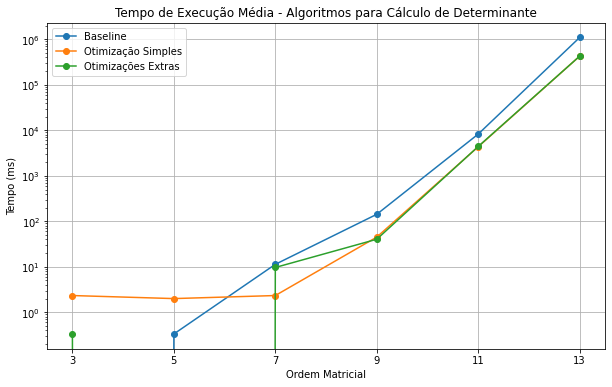

In [13]:
showResults(
    datasets=[baseline_times, v1_optimization_times, v2_optimization_times],
    labels=['Baseline', 'Otimização Simples', 'Otimizações Extras'],
    log=True,
    show_std=False,
    show_in_ms=True
)

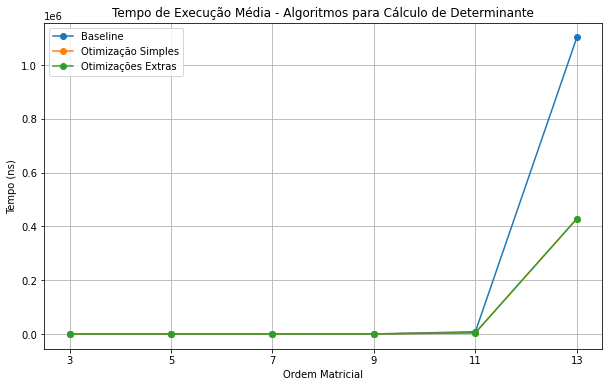

In [14]:
showResults(
    datasets=[baseline_times, v1_optimization_times, v2_optimization_times],
    labels=['Baseline', 'Otimização Simples', 'Otimizações Extras'],
    log=False,
    show_std=False,
    show_in_ms=False
)